<a href="https://colab.research.google.com/github/adetayomathew1/-Installing-VirtualBox-and-Server-2022/blob/main/CHAOTIC_SYSTEM_MODELLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT REMODELLING OF CHAOTIC SYSTEM(Lorentz effect) USING LSTM AND RNN

Importing the necessary libaries for calculating and predicting our model

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

Solving the lorentz attractor and saving the data in df

In [2]:


# Define Lorenz system
def lorentz_system(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma, rho, beta = 10.0, 28.0, 8.0 / 3.0
initial_state = [1.0, 1.0, 1.0]  # Starting point
t_span = (0, 50)  # Simulation time
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # Generate 10,000 points over 50 seconds

# Solve the system
solution = solve_ivp(
    lorentz_system,
    t_span,
    initial_state,
    args=(sigma, rho, beta),
    t_eval=t_eval,
    method='RK45'
)

# Create a DataFrame
df = pd.DataFrame({
    'time': solution.t,
    'x': solution.y[0],
    'y': solution.y[1],
    'z': solution.y[2]
})


Viewing the data in 3d

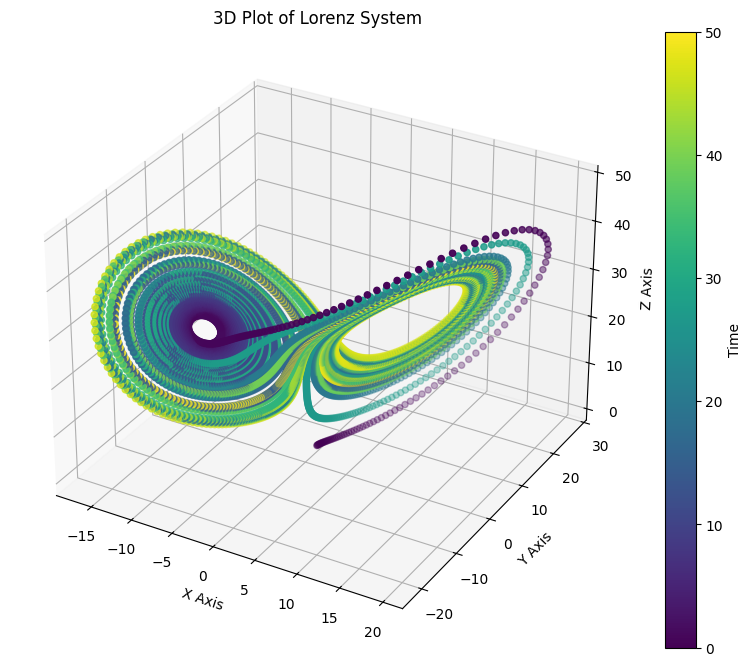

In [4]:


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color the points based on time
sc = ax.scatter(df['x'], df['y'], df['z'], c=df['time'], cmap='viridis')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Plot of Lorenz System')

# Add a colorbar
plt.colorbar(sc, label='Time')

plt.show()


In [16]:
df

,time,x,y,z
0,0.000000,1.000000,1.000000,1.000000
1,0.005001,1.003169,1.129886,0.992050
2,0.010001,1.012504,1.260031,0.984889
3,0.015002,1.027769,1.391200,0.978560
4,0.020002,1.048757,1.524150,0.973116
...,...,...,...,...
9995,49.979998,0.918787,1.697743,15.887825
9996,49.984998,0.957884,1.746507,15.685412
9997,49.989999,0.997531,1.798407,15.486261
9998,49.994999,1.037880,1.853508,15.290368


In [14]:
# Prepare data for Keras
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        xs.append(data[i:i+seq_length])
        ys.append(data[i+seq_length])
    return np.array(xs), np.array(ys)

data = df[['x', 'y', 'z']].values
seq_length = 10
x, y = create_sequences(data, seq_length)

array([[[ 1.        ,  1.        ,  1.        ],
        [ 1.00316928,  1.12988577,  0.99204996],
        [ 1.0125042 ,  1.26003083,  0.98488931],
        ...,
        [ 1.14447788,  1.94114251,  0.96284164],
        [ 1.18692104,  2.08864634,  0.96175993],
        [ 1.23454649,  2.24159078,  0.96206454]],

       [[ 1.00316928,  1.12988577,  0.99204996],
        [ 1.0125042 ,  1.26003083,  0.98488931],
        [ 1.02776854,  1.39120001,  0.9785596 ],
        ...,
        [ 1.18692104,  2.08864634,  0.96175993],
        [ 1.23454649,  2.24159078,  0.96206454],
        [ 1.28742935,  2.40057276,  0.96388093]],

       [[ 1.0125042 ,  1.26003083,  0.98488931],
        [ 1.02776854,  1.39120001,  0.9785596 ],
        [ 1.048757  ,  1.52415034,  0.97311552],
        ...,
        [ 1.23454649,  2.24159078,  0.96206454],
        [ 1.28742935,  2.40057276,  0.96388093],
        [ 1.34566303,  2.5662108 ,  0.96736217]],

       ...,

       [[ 0.60820955,  1.4133358 , 17.62612211],
        [ 0

In [17]:
y

array([[ 1.28742935,  2.40057276,  0.96388093],
       [ 1.34566303,  2.5662108 ,  0.96736217],
       [ 1.40935549,  2.73915085,  0.97269169],
       ...,
       [ 0.99753122,  1.79840709, 15.48626144],
       [ 1.03787957,  1.8535083 , 15.29036767],
       [ 1.07907433,  1.91188482, 15.09772919]])

In [18]:
# Split into training and testing sets
split = int(0.7 * len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

In [19]:
x_train.shape

(6993, 10, 3)

In [21]:
x_test.shape

(2997, 10, 3)

In [22]:
# Build and train RNN
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(16, input_shape=(None, 3)))
RNNmodel.add(Dense(3))
RNNmodel.compile(loss='mean_squared_error', optimizer='adam')
rnn_history = RNNmodel.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=2, epochs=75)

# Build and train LSTM
LSTMModel = Sequential()
LSTMModel.add(LSTM(16, input_shape=(None, 3)))
LSTMModel.add(Dense(3))
LSTMModel.compile(loss='mean_squared_error', optimizer='adam')
lstm_history = LSTMModel.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=2, epochs=75)

Epoch 1/75


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 - 4s - 17ms/step - loss: 218.1641 - val_loss: 187.9703
Epoch 2/75
219/219 - 1s - 5ms/step - loss: 159.1188 - val_loss: 149.4341
Epoch 3/75
219/219 - 1s - 6ms/step - loss: 121.8313 - val_loss: 122.1924
Epoch 4/75
219/219 - 1s - 5ms/step - loss: 94.4886 - val_loss: 99.3121
Epoch 5/75
219/219 - 1s - 4ms/step - loss: 73.3406 - val_loss: 80.6665
Epoch 6/75
219/219 - 1s - 6ms/step - loss: 57.0155 - val_loss: 65.7348
Epoch 7/75
219/219 - 1s - 5ms/step - loss: 44.6350 - val_loss: 54.1957
Epoch 8/75
219/219 - 1s - 5ms/step - loss: 35.2684 - val_loss: 44.9231
Epoch 9/75
219/219 - 2s - 8ms/step - loss: 28.1311 - val_loss: 37.5271
Epoch 10/75
219/219 - 2s - 10ms/step - loss: 22.7365 - val_loss: 31.5752
Epoch 11/75
219/219 - 1s - 5ms/step - loss: 18.5952 - val_loss: 26.6094
Epoch 12/75
219/219 - 1s - 5ms/step - loss: 15.3423 - val_loss: 22.4881
Epoch 13/75
219/219 - 1s - 6ms/step - loss: 12.7692 - val_loss: 19.0384
Epoch 14/75
219/219 - 1s - 5ms/step - loss: 10.7158 - val_loss: 16.1665
Epoc

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


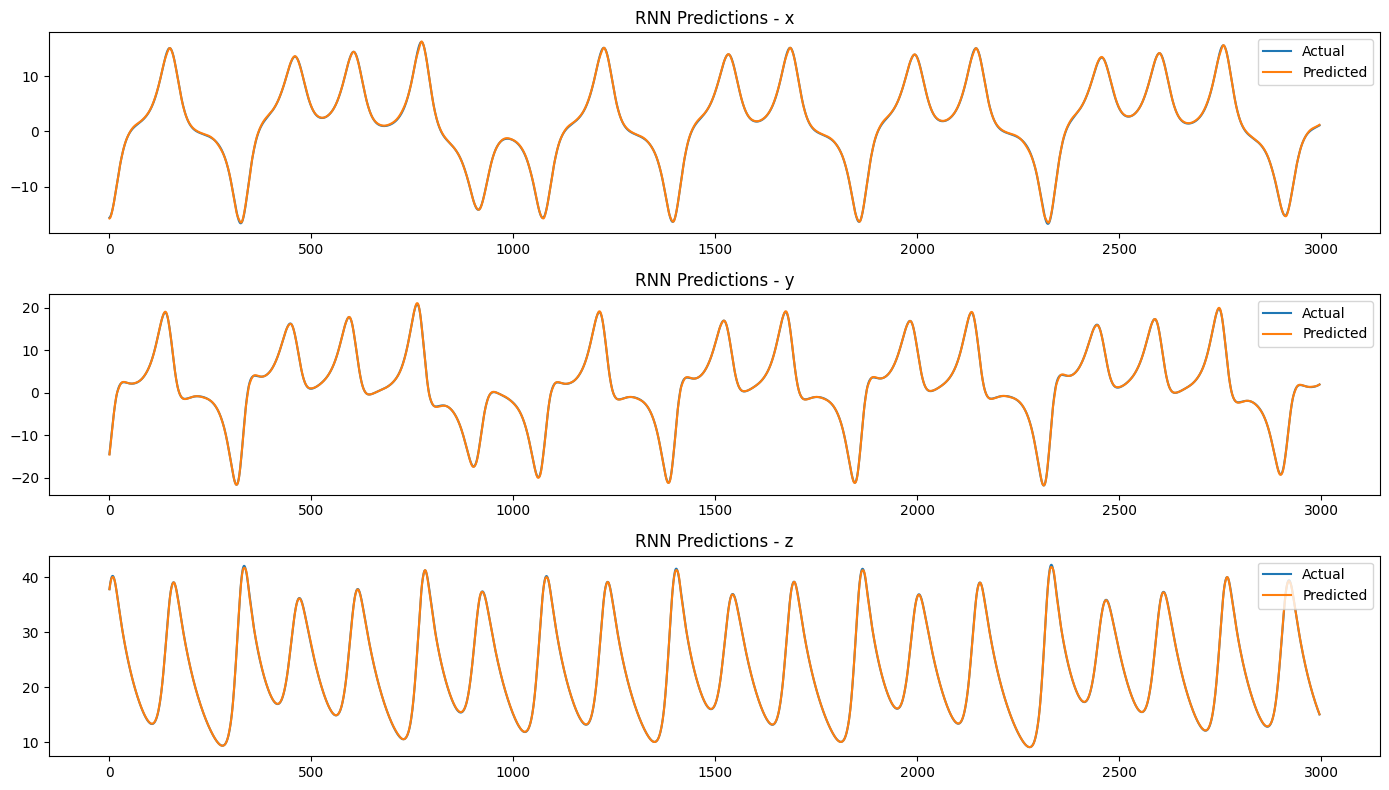

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


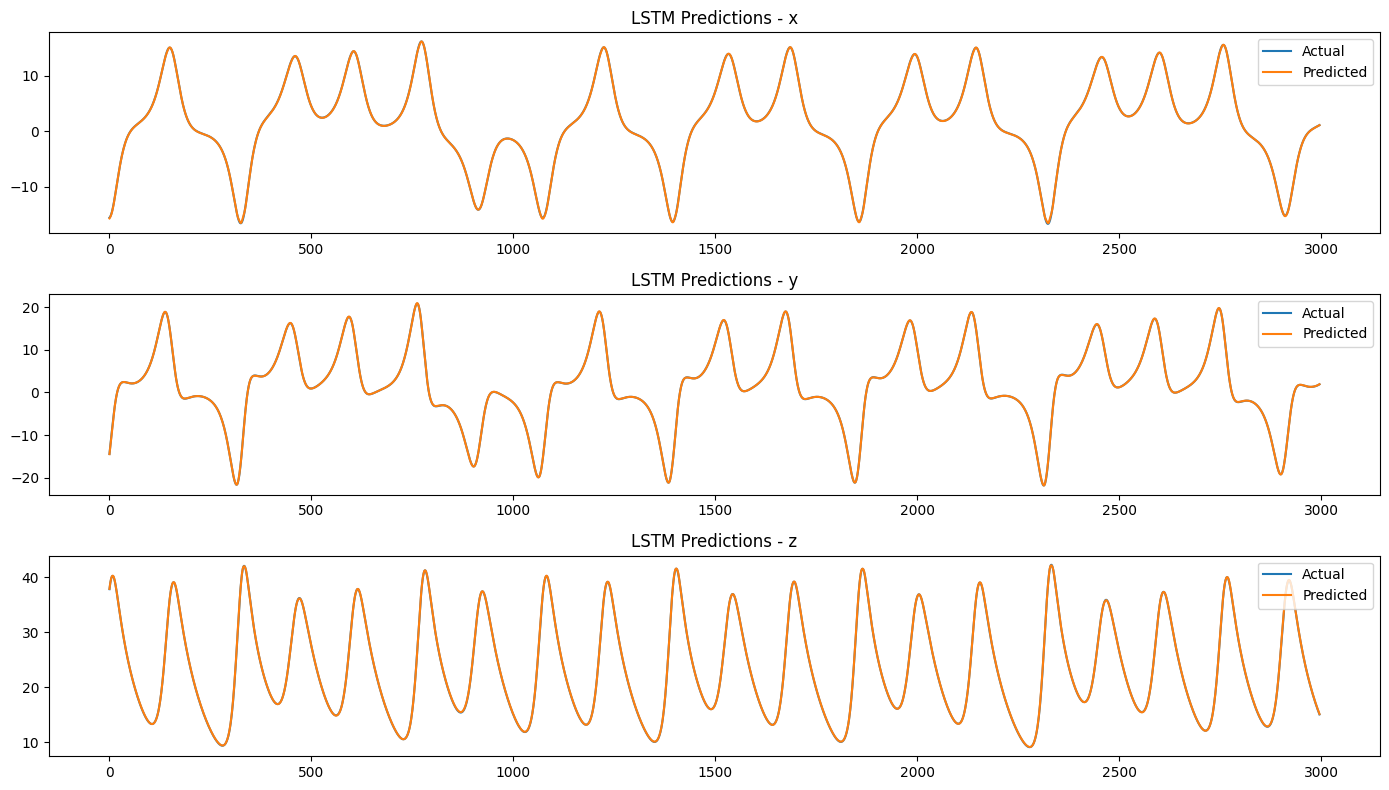

In [23]:
# Visualize predictions vs actual data
def plot_predictions(model, x_test, y_test, title):
    predictions = model.predict(x_test)
    plt.figure(figsize=(14, 8))
    for i, col in enumerate(['x', 'y', 'z']):
        plt.subplot(3, 1, i+1)
        plt.plot(y_test[:, i], label='Actual')
        plt.plot(predictions[:, i], label='Predicted')
        plt.title(f'{title} - {col}')
        plt.legend()
    plt.tight_layout()
    plt.show()

plot_predictions(RNNmodel, x_test, y_test, 'RNN Predictions')
plot_predictions(LSTMModel, x_test, y_test, 'LSTM Predictions')


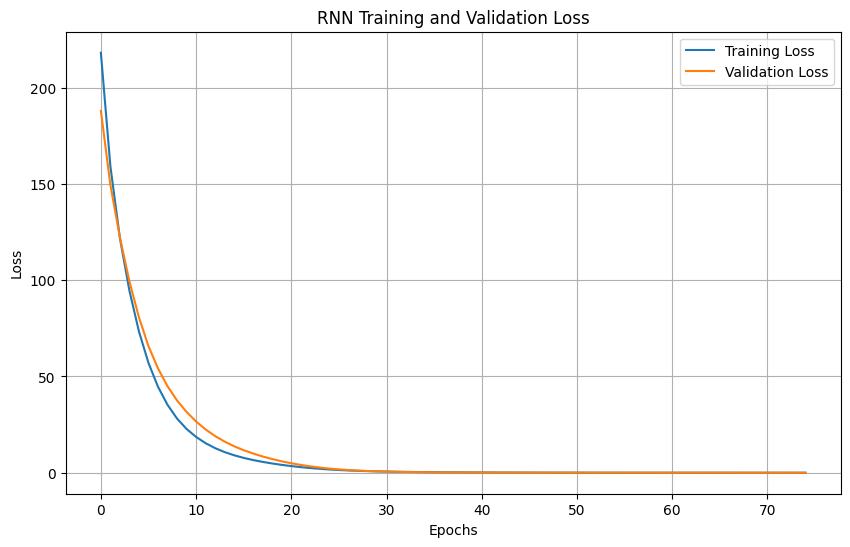

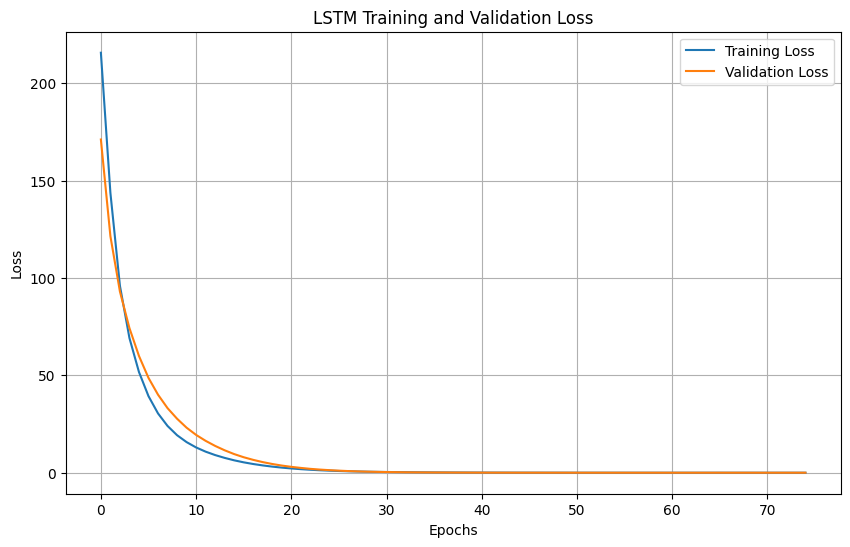

In [25]:
def plot_loss(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

plot_loss(rnn_history, 'RNN Training and Validation Loss')
plot_loss(lstm_history, 'LSTM Training and Validation Loss')

In [26]:
# Extract validation loss at 50 and 75 epochs
def get_validation_loss(history, epochs):
    val_loss = history.history['val_loss']
    return val_loss[epochs - 1]  # Epochs are 0-indexed in the history object

rnn_val_loss_50 = get_validation_loss(rnn_history, 50)
rnn_val_loss_75 = get_validation_loss(rnn_history, 75)

lstm_val_loss_50 = get_validation_loss(lstm_history, 50)
lstm_val_loss_75 = get_validation_loss(lstm_history, 75)

# Print results in a table format
results = {
    'Model': ['RNN', 'LSTM', 'RNN', 'LSTM'],
    'Epochs': [50, 50, 75, 75],
    'Validation Loss': [rnn_val_loss_50, lstm_val_loss_50, rnn_val_loss_75, lstm_val_loss_75]
}

results_df = pd.DataFrame(results)
print(results_df)

  Model  Epochs  Validation Loss
0   RNN      50         0.030332
1  LSTM      50         0.016524
2   RNN      75         0.006575
3  LSTM      75         0.001925


At 50 Epochs:

RNN: Validation loss = 0.030332

LSTM: Validation loss = 0.016524

The LSTM's validation loss is ~45% lower than the RNN's.

At 75 Epochs:

RNN: Validation loss = 0.006575

LSTM: Validation loss = 0.001925

The LSTM's validation loss is ~70% lower than the RNN's.